# Business Introduction
PowerCharge Utilities is a prominent electric utility provider operating in a dynamic and evolving energy landscape. The company's primary mission is to ensure the reliable delivery of electrical power to millions of customers across urban and suburban areas. PowerCharge Utilities has established itself as a key player in the energy sector, focusing on sustainability and adapting to emerging technologies.
The energy sector has witnessed a significant transformation in recent years driven by environmental concerns, regulatory changes, and technological advancements. One of the most notable developments has been the rapid adoption of electric vehicles (EVs) as part of global efforts to reduce carbon emissions and combat climate change.

# Business Problem
PowerCharge Utilities encounters several critical challenges due to the growing adoption of electric veicies.
1. Increased Load Demand: Widespread EV adoption has caused a significant spike in electricity demand, particularly during peak charging times. This strains the existing distribution network infrastructure.
2. Grid Overloads: Frequent overloads in the distribution network leads to voltage fluctuations and outages in specific areas, affecting overall grid reliability.
3. Customer Satisfaction: EV owners expect reliable and convenient charging services. Ensuring this level of service is essential to maintaining customer satisfaction and loyalty.
4. Cost Management: Balancing increased load demands and grid reliability comes at a significant cost. PowerCharge Utilities must optimize network investments to manage expenses effectively.

# Rationale for the Project
Distribution Network Analysis in the energy industry refers to the process of studying and evaluating the electrical distribution networks that deliver electricity from high-voltage transmission lines to end-users, such as homes, businesses, and industrial facilities.

This analysis becomes even more critical with the rise of EVs, as it transforms the energy landscape.

Top Five Reasons for the Project's Significance:
1. Customer Retention: Maintaining a reliable EV charging experience is essential for retaining existing customers who have embraced EVs.
2. Revenue Growth: Accommodating the growing demand for EV charging services opens new revenue streams and capitalizes on the expanding EV market.
3. Sustainability Goals: Supporting EVs aligns with the company's sustainability objectives, contributing to reduced greenhouse gas emissions.
4. Regulatory Compliance: Meeting regulatory standards for grid reliability and capacity planning is vital to avoid penalties and ensure operational excellence.
5. Technological Innovation: Embracing data analytics empowers PowerCharge Utilities to stay at the forefront of technological innovation in the energy sector.

# Aim of the Project
The project aims to achieve the following objectives:
1. Assess Network Capacity: Conduct a comprehensive analysis of the distribution network's current capacity to handle increased load from EV charging stations.
2. Identify Bottlenecks: Identify potential bottlenecks and vulnerabilities within the distribution network that could hinder reliable electricity delivery to EV charging stations.
3. Optimize Network Upgrades: Develop a data-driven strategy for network upgrades that maximizes efficiency, minimizes costs, and ensures grid reliability.

# Data Description
This project contains 3 dataset as follows:
1. Electric Vehicle (EV) Distribution Data:
- Timestamp: Date and time of data points.
- Geographical Area: Location of each data point.
- Customer Type: Categorization of customers (e.g., residential, commercial).
- Electricity Consumption (kWh): Amount of electricity consumed.
- EV Charging Station Location:
- Latitude and longitude of charging stations.
- EV Charging Station Specifications: Details about charging stations.
- EV Type: Type of electric vehicles.
- Charging Habit: Charging behavior (e.g., daily, weekly).
- Number of EVs: Count of electric vehicles.
2. Geospatial Data (Distribution Network Geographies):
- Substation ID: Unique identifier for distribution substations.
- Substation Location: coordinates of substations. Geographic
- Transmission Line Capacity (MW): Capacity of transmission lines.
3. Weather Data:
- Timestamp: Date and time of weather data.
- Temperature temperature. (°C): Ambient
- Precipitation (mm): amount (rainfall or snowfall). Precipitation
- Weather Conditions: Categorization of weather conditions (e.g., Clear, Rainy).

NB: Substation_ID column: Will be a secondary key in EV Distribution dataset and weather dataset and a primary key in Geospatial dataset

# Data Analytics Project Scope
1. Exploratory Data Analysis: Conduct EDA to gain insights into electricity consumption patterns and network performance.
2. Capacity Assessment: Utilize historical data to assess the current distribution network's capacity and identify areas with high demand growth.
3. Network Optimization: Utilize optimization algorithms to identify cost-effective network upgrades that address capacity shortfalls.
4. Reporting and Recommendations: Present findings, including capacity assessments and upgrade recommendations, to the

# Project Code

## Importation of necessary libraries and Loading of data

In [6]:
#Importation of necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [7]:
#Load the dataset
distribution_data = pd.read_csv("C:\\Users\\USER\\Downloads\\ev_distribution_dataset.csv")
geospatial_data = pd.read_csv("C:\\Users\\USER\\Downloads\\geospatial_dataset.csv")
weather_data = pd.read_csv("C:\\Users\\USER\\Downloads\\weather_dataset.csv")

In [8]:
distribution_data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Location,EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
1,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
3,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907


In [9]:
geospatial_data.head()

,Substation_ID,Substation_Location,Transmission_Line_Capacity (MW)
0,Substation_907,"(57.25813554648914, -70.90582041775649)",40
1,Substation_218,"(70.02538473360673, -84.38057237161145)",71
2,Substation_339,"(80.39323542610704, -75.79784143914193)",85
3,Substation_773,"(49.12307771334813, -87.3598904388042)",10
4,Substation_349,"(66.79887060665365, -86.51124108848195)",40


weather_data.head()

## Understanding the structure of the dataset

In [10]:
#Check data types and missing values
distribution_data.info()

#Check for description of numerical columns
distribution_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           500 non-null    object 
 1   Geographical_Area                   500 non-null    object 
 2   Customer_Type                       500 non-null    object 
 3   Electricity_Consumption (kWh)       500 non-null    float64
 4   EV_Charging_Station_Location        500 non-null    object 
 5   EV_Charging_Station_Specifications  500 non-null    object 
 6   EV_Type                             500 non-null    object 
 7   Charging_Habit                      500 non-null    object 
 8   Number_of_EVs                       500 non-null    int64  
 9   Substation_ID                       500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


,Electricity_Consumption (kWh),Number_of_EVs
count,500.000000,500.000000
mean,506.188554,5.240000
std,80.251238,2.577535
min,315.912577,1.000000
25%,439.978312,3.000000
50%,505.820872,5.000000
75%,557.230712,8.000000
max,718.980293,9.000000


In [11]:
#Check data types and missing values
geospatial_data.info()

#Check for description of numerical columns
geospatial_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Substation_ID                    50 non-null     object
 1   Substation_Location              50 non-null     object
 2   Transmission_Line_Capacity (MW)  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


,Transmission_Line_Capacity (MW)
count,50.000000
mean,52.740000
std,24.857808
min,10.000000
25%,33.250000
50%,51.500000
75%,74.750000
max,94.000000


In [12]:
#Check data types and missing values
weather_data.info()

#Check for description of numerical columns
weather_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           97 non-null     object 
 1   Temperature (°C)    97 non-null     float64
 2   Precipitation (mm)  97 non-null     float64
 3   Weather_Conditions  97 non-null     object 
 4   Substation_ID       97 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.9+ KB


,Temperature (°C),Precipitation (mm)
count,97.000000,97.000000
mean,25.311668,2.542096
std,4.821917,1.396957
min,12.449425,0.007923
25%,22.245088,1.390244
50%,25.248302,2.688862
75%,28.902260,3.656106
max,34.104493,4.965771


## Exploratory Data Analysis
##### This phase involves both Univariate and Bivariate analysis

##### Univariate Analysis
1. Visualize the distribution of electricity consumption.
2. Analyze the distribution of EV types, charging habits and customer type.

##### Bivariate Analysis
3. Use geospatial data to visualize the locations of substations and EV charging stations.
4. Analyze the capacity of transmission lines.

### Univariate Analysis

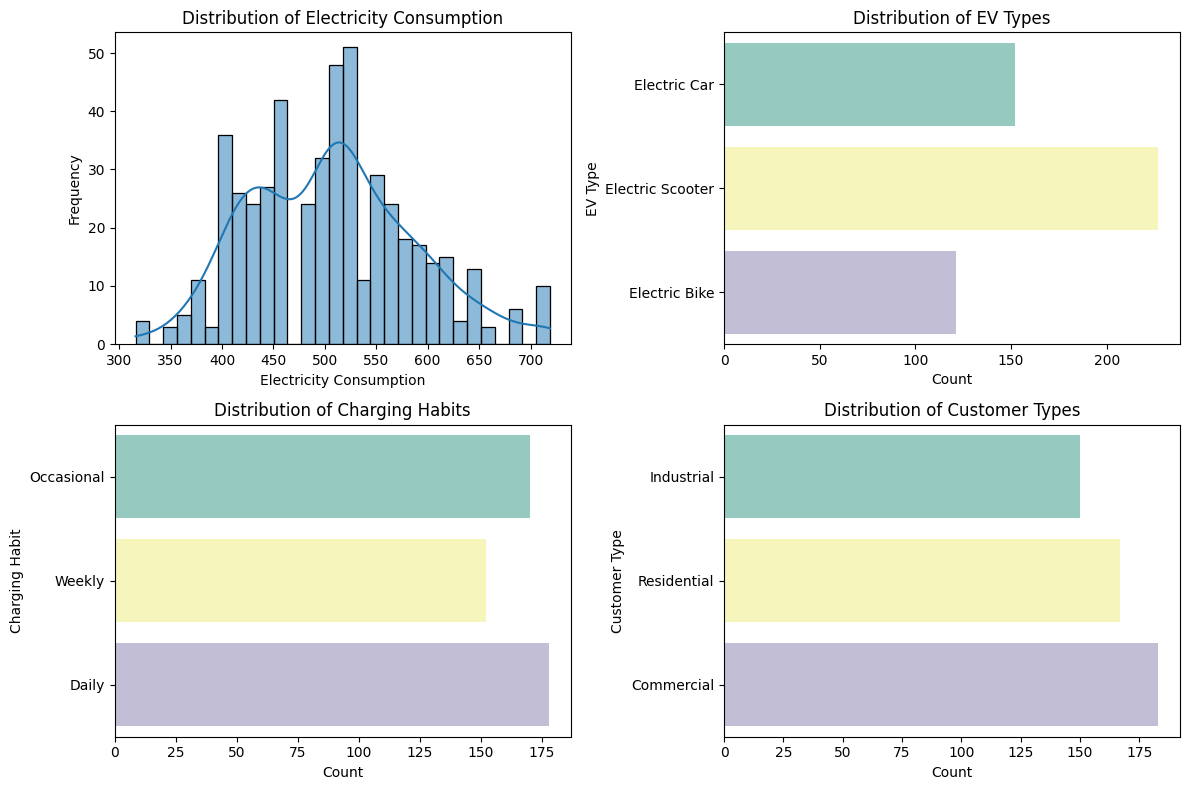

In [13]:
# Create a 2 x 2 subplot grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot distribution of electricity consumption
sns.histplot(data=distribution_data, x='Electricity_Consumption (kWh)', bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Electricity Consumption")
axes[0, 0].set_xlabel("Electricity Consumption")
axes[0, 0].set_ylabel("Frequency")

# Define custom color palette for categorical plots
custom_palette = sns.color_palette("Set3", 3)

# Plot distribution of EV Types with custom colors
sns.countplot(data=distribution_data, y='EV_Type', ax=axes[0, 1], palette=custom_palette, hue='EV_Type', legend=False)
axes[0, 1].set_title("Distribution of EV Types")
axes[0, 1].set_xlabel("Count")
axes[0, 1].set_ylabel("EV Type")

# Plot distribution of Charging Habits with custom colors
sns.countplot(data=distribution_data, y='Charging_Habit', ax=axes[1, 0], palette=custom_palette, hue='Charging_Habit', legend=False)
axes[1, 0].set_title("Distribution of Charging Habits")
axes[1, 0].set_xlabel("Count")
axes[1, 0].set_ylabel("Charging Habit")

# Plot distribution of Customer Type with custom colors
sns.countplot(data=distribution_data, y='Customer_Type', ax=axes[1, 1], palette=custom_palette, hue='Customer_Type', legend=False)
axes[1, 1].set_title("Distribution of Customer Types")
axes[1, 1].set_xlabel("Count")
axes[1, 1].set_ylabel("Customer Type")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Bivariate Analysis

In [14]:
# 1. Split the 'EV_Charging_Station_Location' column into 'ev_latitude' and 'ev_longitude'
if 'EV_Charging_Station_Location' in distribution_data.columns:
    distribution_data[['ev_latitude', 'ev_longitude']] = distribution_data['EV_Charging_Station_Location'].str.split(', ', expand=True)

    # Change the data type to float
    distribution_data['ev_latitude'] = distribution_data['ev_latitude'].str.replace('(', '').astype(float)
    distribution_data['ev_longitude'] = distribution_data['ev_longitude'].str.replace(')', '').astype(float)

# 2. Split the 'Substation_Location' column into 'substation_latitude' and 'substation_longitude'
if 'Substation_Location' in geospatial_data.columns:
    geospatial_data[['substation_latitude', 'substation_longitude']] = geospatial_data['Substation_Location'].str.split(', ', expand=True)

    # Change the data type to float
    geospatial_data['substation_latitude'] = geospatial_data['substation_latitude'].str.replace('(', '').astype(float)
    geospatial_data['substation_longitude'] = geospatial_data['substation_longitude'].str.replace(')', '').astype(float)

# Verify the presence of new columns
print("\nDistribution Data Head:")
print(distribution_data.head())

print("\nGeospatial Data Head:")
print(geospatial_data.head())


Distribution Data Head:
             Timestamp Geographical_Area Customer_Type  \
0  2020-01-10 18:00:00             Urban    Industrial   
1  2020-01-22 17:00:00             Rural   Residential   
2  2020-01-10 18:00:00             Urban    Industrial   
3  2020-01-22 17:00:00             Rural   Residential   
4  2020-01-10 18:00:00             Urban    Industrial   

   Electricity_Consumption (kWh)              EV_Charging_Station_Location  \
0                     714.394409  (64.01943603679787, -129.53196438913122)   
1                     554.336019  (48.447826648452946, -71.98859080823637)   
2                     714.394409  (64.01943603679787, -129.53196438913122)   
3                     554.336019  (48.447826648452946, -71.98859080823637)   
4                     714.394409  (64.01943603679787, -129.53196438913122)   

  EV_Charging_Station_Specifications           EV_Type Charging_Habit  \
0                             Type 2      Electric Car     Occasional   
1          

In [15]:
# 3. Drop original columns in datasets used to generate the latitude and longitude, as they are no longer required
if 'EV_Charging_Station_Location' in distribution_data.columns:
    distribution_data = distribution_data.drop(columns=['EV_Charging_Station_Location'])

if 'Substation_Location' in geospatial_data.columns:
    geospatial_data = geospatial_data.drop(columns=['Substation_Location'])

# Verify the columns have been dropped
print("\nDistribution Data after dropping original columns:")
print(distribution_data.head())

print("\nGeospatial Data after dropping original columns:")
print(geospatial_data.head())


Distribution Data after dropping original columns:
             Timestamp Geographical_Area Customer_Type  \
0  2020-01-10 18:00:00             Urban    Industrial   
1  2020-01-22 17:00:00             Rural   Residential   
2  2020-01-10 18:00:00             Urban    Industrial   
3  2020-01-22 17:00:00             Rural   Residential   
4  2020-01-10 18:00:00             Urban    Industrial   

   Electricity_Consumption (kWh) EV_Charging_Station_Specifications  \
0                     714.394409                             Type 2   
1                     554.336019                             Type 2   
2                     714.394409                             Type 2   
3                     554.336019                             Type 2   
4                     714.394409                             Type 2   

            EV_Type Charging_Habit  Number_of_EVs   Substation_ID  \
0      Electric Car     Occasional              8  Substation_907   
1  Electric Scooter         Weekly

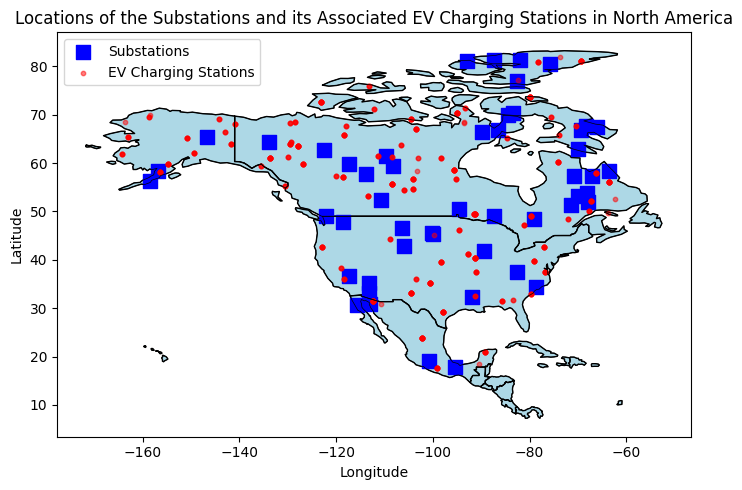

In [16]:
# Convert the dataframes to GeoDataFrames
ev_gdf = gpd.GeoDataFrame(distribution_data, geometry=gpd.points_from_xy(distribution_data.ev_longitude, distribution_data.ev_latitude))
substation_gdf = gpd.GeoDataFrame(geospatial_data, geometry=gpd.points_from_xy(geospatial_data.substation_longitude, geospatial_data.substation_latitude))

# Load the world map data
world = gpd.read_file(r"C:\Users\USER\Downloads\110m_cultural\ne_110m_admin_0_countries.shp")

# Filter the map to North America using SOVEREIGNT or ADMIN column
north_america = world[world['SOVEREIGNT'].isin(['United States of America', 'Canada', 'Mexico', 'Guatemala', 'Belize', 'Honduras',
                                                'El Salvador', 'Nicaragua', 'Costa Rica', 'Panama', 'Cuba', 'Jamaica',
                                                'Haiti', 'Dominican Republic', 'Bahamas', 'Trinidad and Tobago', 'Barbados',
                                                'Grenada', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Dominica',
                                                'Antigua and Barbuda', 'Saint Kitts and Nevis'])]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(10, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substations on the map
substation_gdf.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substations')
ev_gdf.plot(ax=ax, markersize=10, color='red', label='EV Charging Stations', alpha=0.5)

# Set title and axis labels
plt.title('Locations of the Substations and its Associated EV Charging Stations in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
from shapely.geometry import LineString

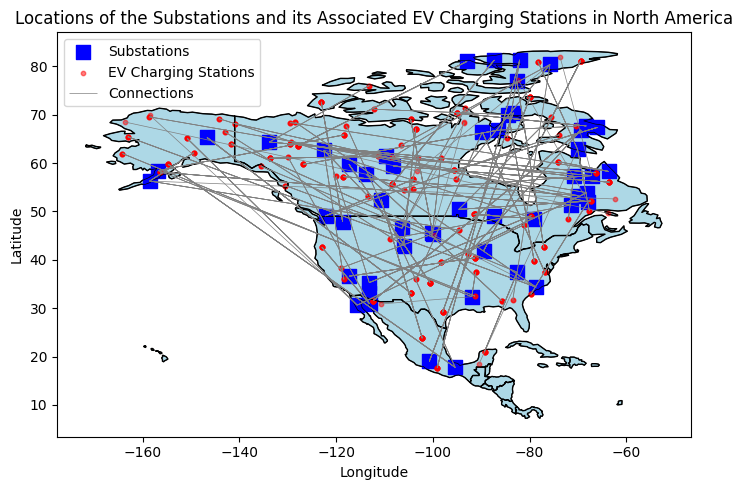

In [18]:
# Convert the dataframes to GeoDataFrames
ev_gdf = gpd.GeoDataFrame(distribution_data, geometry=gpd.points_from_xy(distribution_data.ev_longitude, distribution_data.ev_latitude))
substation_gdf = gpd.GeoDataFrame(geospatial_data, geometry=gpd.points_from_xy(geospatial_data.substation_longitude, geospatial_data.substation_latitude))

# Create lines connecting EV stations to their associated substations
lines = [] 
for _, ev_row in distribution_data.iterrows():
    substation = geospatial_data[geospatial_data['Substation_ID'] == ev_row['Substation_ID']].iloc[0]
    line = [(ev_row['ev_longitude'], ev_row['ev_latitude']), 
            (substation['substation_longitude'], substation['substation_latitude'])]
    lines.append(line)
                
line_gdf = gpd.GeoDataFrame(geometry=[LineString(line) for line in lines])

# Load the world map data
world = gpd.read_file(r"C:\Users\USER\Downloads\110m_cultural\ne_110m_admin_0_countries.shp")

# Filter the map to North America using SOVEREIGNT or ADMIN column
north_america = world[world['SOVEREIGNT'].isin(['United States of America', 'Canada', 'Mexico', 'Guatemala', 'Belize', 'Honduras',
                                                'El Salvador', 'Nicaragua', 'Costa Rica', 'Panama', 'Cuba', 'Jamaica',
                                                'Haiti', 'Dominican Republic', 'Bahamas', 'Trinidad and Tobago', 'Barbados',
                                                'Grenada', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Dominica',
                                                'Antigua and Barbuda', 'Saint Kitts and Nevis'])]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(10, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substations on the map
substation_gdf.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substations')
ev_gdf.plot(ax=ax, markersize=10, color='red', label='EV Charging Stations', alpha=0.5)

# Plotting lines
line_gdf.plot(ax=ax, linewidth=0.5, color='gray', label='Connections')

# Set title and axis labels
plt.title('Locations of the Substations and its Associated EV Charging Stations in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()

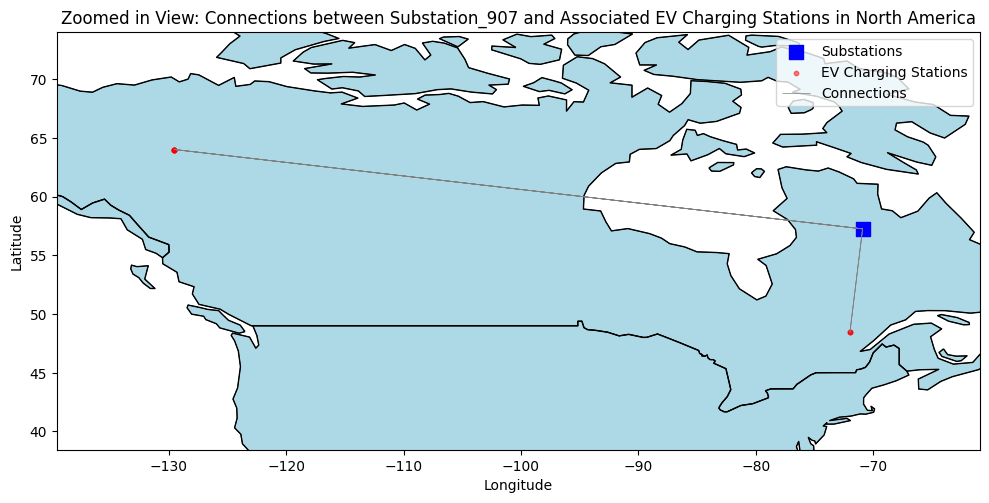

In [19]:
# Let's zoom in and see the connection of substation 1 to EV charging stations
# Filter for the first substation
selected_substation = geospatial_data.iloc[0]
associated_ev = distribution_data[distribution_data['Substation_ID'] == selected_substation['Substation_ID']]

# Convert to GeoDataFrames
ev_gdf_selected = gpd.GeoDataFrame(
    associated_ev, geometry=gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))

# Extract longitude and latitude for the selected substation
selected_substation_lon = [selected_substation['substation_longitude']]
selected_substation_lat = [selected_substation['substation_latitude']]

substation_gdf_selected = gpd.GeoDataFrame(
    selected_substation.to_frame().transpose(),
    geometry=gpd.points_from_xy(selected_substation_lon, selected_substation_lat))

# Create lines connecting EV stations to the selected substation
lines_selected = [
    [(ev_row['ev_longitude'], ev_row['ev_latitude']),
     (selected_substation['substation_longitude'], selected_substation['substation_latitude'])]
    for _, ev_row in associated_ev.iterrows()
]

line_gdf_selected = gpd.GeoDataFrame(geometry=[LineString(line) for line in lines_selected])

# Load the world map data
world = gpd.read_file(r"C:\Users\USER\Downloads\110m_cultural\ne_110m_admin_0_countries.shp")

# Filter the map to North America using SOVEREIGNT or ADMIN column
north_america = world[world['SOVEREIGNT'].isin(['United States of America', 'Canada', 'Mexico', 'Guatemala', 'Belize', 'Honduras',
                                                'El Salvador', 'Nicaragua', 'Costa Rica', 'Panama', 'Cuba', 'Jamaica',
                                                'Haiti', 'Dominican Republic', 'Bahamas', 'Trinidad and Tobago', 'Barbados',
                                                'Grenada', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Dominica',
                                                'Antigua and Barbuda', 'Saint Kitts and Nevis'])]

# Determining the bounding box for zoomed in area
buffer = 10  # degrees
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(10, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substations on the map
substation_gdf_selected.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substations')
ev_gdf_selected.plot(ax=ax, markersize=10, color='red', label='EV Charging Stations', alpha=0.5)

# Plotting lines
line_gdf_selected.plot(ax=ax, linewidth=0.5, color='gray', label='Connections')

# Setting the zoom-in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Set title and axis labels
plt.title(f'Zoomed in View: Connections between {selected_substation["Substation_ID"]} and Associated EV Charging Stations in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()

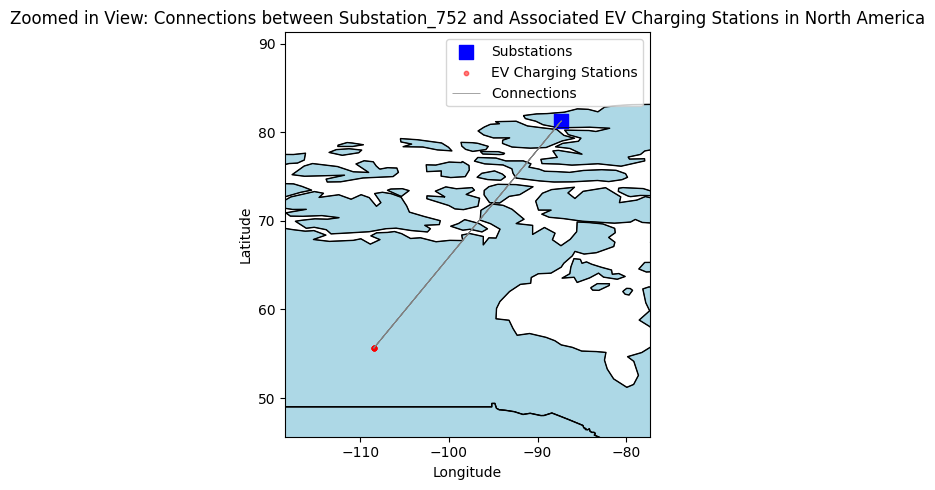

In [20]:
# Let's zoom in and see the connection of substation 1 to EV charging stations
# Filter for the first substation
selected_substation = geospatial_data.iloc[5]
associated_ev = distribution_data[distribution_data['Substation_ID'] == selected_substation['Substation_ID']]

# Convert to GeoDataFrames
ev_gdf_selected = gpd.GeoDataFrame(
    associated_ev, geometry=gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))

# Extract longitude and latitude for the selected substation
selected_substation_lon = [selected_substation['substation_longitude']]
selected_substation_lat = [selected_substation['substation_latitude']]

substation_gdf_selected = gpd.GeoDataFrame(
    selected_substation.to_frame().transpose(),
    geometry=gpd.points_from_xy(selected_substation_lon, selected_substation_lat))

# Create lines connecting EV stations to the selected substation
lines_selected = [
    [(ev_row['ev_longitude'], ev_row['ev_latitude']),
     (selected_substation['substation_longitude'], selected_substation['substation_latitude'])]
    for _, ev_row in associated_ev.iterrows()
]

line_gdf_selected = gpd.GeoDataFrame(geometry=[LineString(line) for line in lines_selected])

# Load the world map data
world = gpd.read_file(r"C:\Users\USER\Downloads\110m_cultural\ne_110m_admin_0_countries.shp")

# Filter the map to North America using SOVEREIGNT or ADMIN column
north_america = world[world['SOVEREIGNT'].isin(['United States of America', 'Canada', 'Mexico', 'Guatemala', 'Belize', 'Honduras',
                                                'El Salvador', 'Nicaragua', 'Costa Rica', 'Panama', 'Cuba', 'Jamaica',
                                                'Haiti', 'Dominican Republic', 'Bahamas', 'Trinidad and Tobago', 'Barbados',
                                                'Grenada', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Dominica',
                                                'Antigua and Barbuda', 'Saint Kitts and Nevis'])]

# Determining the bounding box for zoomed in area
buffer = 10  # degrees
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(10, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substations on the map
substation_gdf_selected.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substations')
ev_gdf_selected.plot(ax=ax, markersize=10, color='red', label='EV Charging Stations', alpha=0.5)

# Plotting lines
line_gdf_selected.plot(ax=ax, linewidth=0.5, color='gray', label='Connections')

# Setting the zoom-in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Set title and axis labels
plt.title(f'Zoomed in View: Connections between {selected_substation["Substation_ID"]} and Associated EV Charging Stations in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()

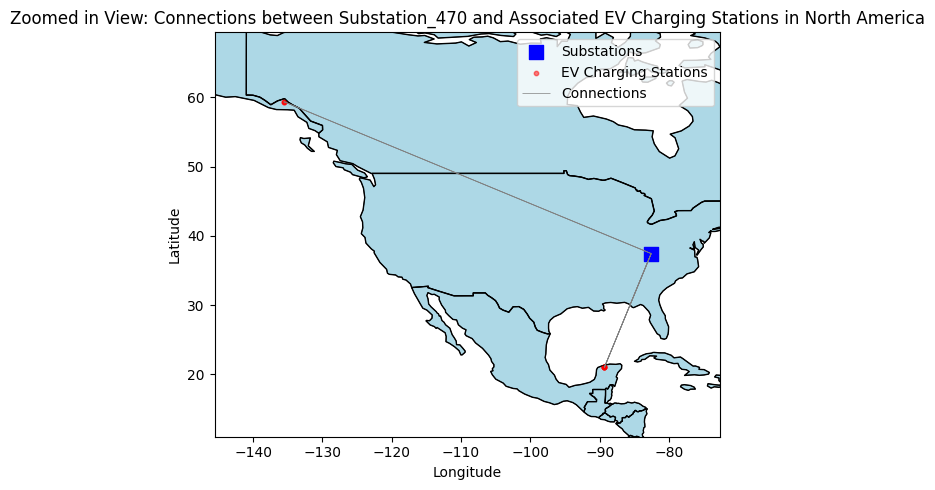

In [21]:
# Let's zoom in and see the connection of substation 1 to EV charging stations
# Filter for the first substation
selected_substation = geospatial_data.iloc[49]
associated_ev = distribution_data[distribution_data['Substation_ID'] == selected_substation['Substation_ID']]

# Convert to GeoDataFrames
ev_gdf_selected = gpd.GeoDataFrame(
    associated_ev, geometry=gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))

# Extract longitude and latitude for the selected substation
selected_substation_lon = [selected_substation['substation_longitude']]
selected_substation_lat = [selected_substation['substation_latitude']]

substation_gdf_selected = gpd.GeoDataFrame(
    selected_substation.to_frame().transpose(),
    geometry=gpd.points_from_xy(selected_substation_lon, selected_substation_lat))

# Create lines connecting EV stations to the selected substation
lines_selected = [
    [(ev_row['ev_longitude'], ev_row['ev_latitude']),
     (selected_substation['substation_longitude'], selected_substation['substation_latitude'])]
    for _, ev_row in associated_ev.iterrows()
]

line_gdf_selected = gpd.GeoDataFrame(geometry=[LineString(line) for line in lines_selected])

# Load the world map data
world = gpd.read_file(r"C:\Users\USER\Downloads\110m_cultural\ne_110m_admin_0_countries.shp")

# Filter the map to North America using SOVEREIGNT or ADMIN column
north_america = world[world['SOVEREIGNT'].isin(['United States of America', 'Canada', 'Mexico', 'Guatemala', 'Belize', 'Honduras',
                                                'El Salvador', 'Nicaragua', 'Costa Rica', 'Panama', 'Cuba', 'Jamaica',
                                                'Haiti', 'Dominican Republic', 'Bahamas', 'Trinidad and Tobago', 'Barbados',
                                                'Grenada', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Dominica',
                                                'Antigua and Barbuda', 'Saint Kitts and Nevis'])]

# Determining the bounding box for zoomed in area
buffer = 10  # degrees
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(10, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substations on the map
substation_gdf_selected.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substations')
ev_gdf_selected.plot(ax=ax, markersize=10, color='red', label='EV Charging Stations', alpha=0.5)

# Plotting lines
line_gdf_selected.plot(ax=ax, linewidth=0.5, color='gray', label='Connections')

# Setting the zoom-in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Set title and axis labels
plt.title(f'Zoomed in View: Connections between {selected_substation["Substation_ID"]} and Associated EV Charging Stations in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()

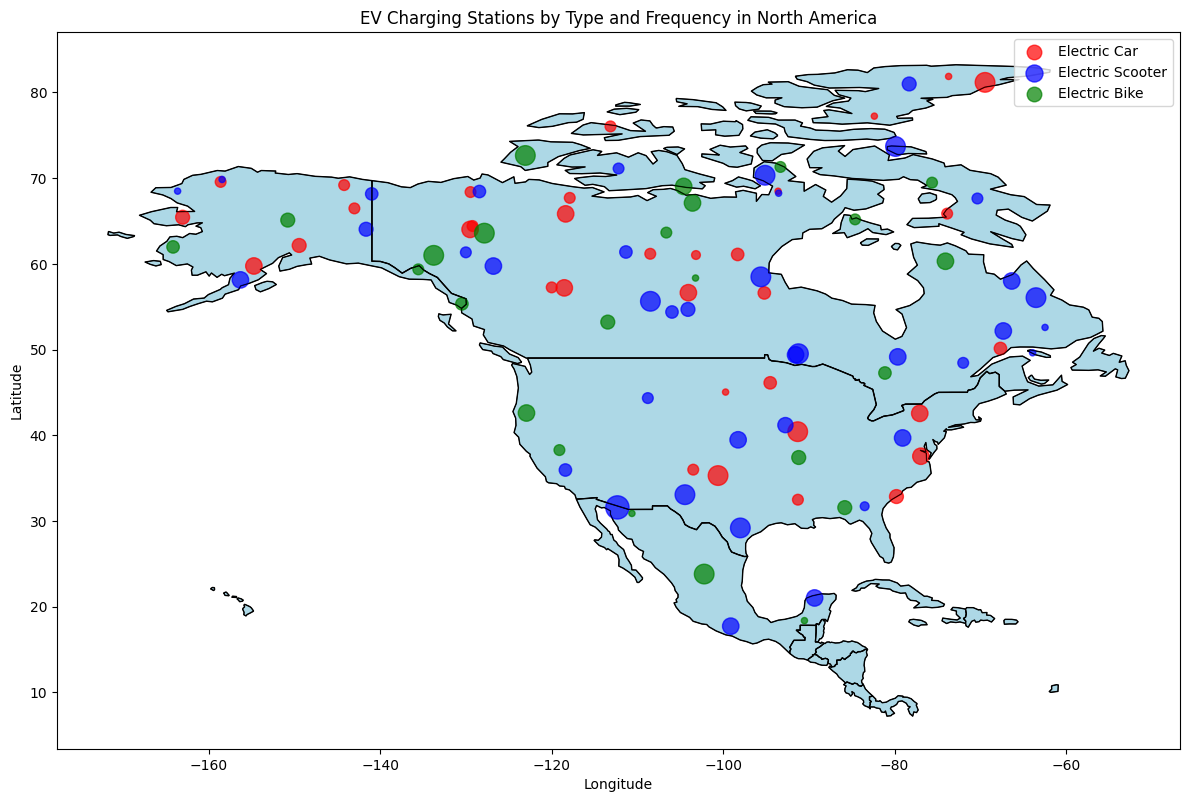

In [22]:
# Group by location and EV type, then count the number of stations
grouped_data = distribution_data.groupby(['ev_latitude', 'ev_longitude', 'EV_Type']).size().reset_index(name='count')

# Convert grouped data to GeoDataFrame
grouped_gdf = gpd.GeoDataFrame(
    grouped_data,
    geometry=gpd.points_from_xy(grouped_data.ev_longitude, grouped_data.ev_latitude)
)

# Load the world map data
world = gpd.read_file(r"C:\Users\USER\Downloads\110m_cultural\ne_110m_admin_0_countries.shp")

# Filter the map to North America using SOVEREIGNT or ADMIN column
north_america = world[world['SOVEREIGNT'].isin(['United States of America', 'Canada', 'Mexico', 'Guatemala', 'Belize', 'Honduras',
                                                'El Salvador', 'Nicaragua', 'Costa Rica', 'Panama', 'Cuba', 'Jamaica',
                                                'Haiti', 'Dominican Republic', 'Bahamas', 'Trinidad and Tobago', 'Barbados',
                                                'Grenada', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Dominica',
                                                'Antigua and Barbuda', 'Saint Kitts and Nevis'])]

# Plotting with Zoom
fig, ax = plt.subplots(figsize=(12, 8))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Define the colors of ev type
colors = {'Electric Car': 'red', 'Electric Scooter': 'blue', 'Electric Bike': 'green'}

# Plotting ev type
for ev_type, color in colors.items():
    sub_gdf = grouped_gdf[grouped_gdf['EV_Type'] == ev_type]
    sub_gdf.plot(ax=ax, markersize=sub_gdf['count']*20, color=color, label=ev_type, alpha=0.7)

# Set title and axis labels
plt.title('EV Charging Stations by Type and Frequency in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()

## Network Capacity Assessment
To perform network capacity assessment:
1. Calculate the total electricity consumption for each substation.
2. Compare the total electricity consumption with the transmission line capacity.

In [23]:
# Group the ev distribution data by substation id and calculate the total electricity consumption for each substation 
total_consumption_per_substation = distribution_data.groupby('Substation_ID')['Electricity_Consumption (kWh)'].sum().reset_index()

# Merging the total consumption data with geospatial data 
network_capacity_data = pd.merge(geospatial_data, total_consumption_per_substation, on='Substation_ID')

# Rename the columns for better understanding
network_capacity_data.rename(columns={'Electricity_Consumption (kWh)': 'Total_Consumption (kWh)'}, inplace=True)

# Calculating the ratio of total consumption to transmission Line Capacity
# Conversion: 1 M = 1000 kWh
network_capacity_data['Consumption_to_Capacity_Ratio'] = (
    network_capacity_data['Total_Consumption (kWh)'] / (network_capacity_data['Transmission_Line_Capacity (MW)'] * 1000)
)

In [24]:
network_capacity_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Consumption (kWh),Consumption_to_Capacity_Ratio
0,Substation_907,40,57.258136,-70.905820,6663.768920,0.166594
1,Substation_218,71,70.025385,-84.380572,5997.437051,0.084471
2,Substation_339,85,80.393235,-75.797841,4536.778685,0.053374
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
4,Substation_349,40,66.798871,-86.511241,4901.836555,0.122546


In [25]:
from shapely.geometry import Point

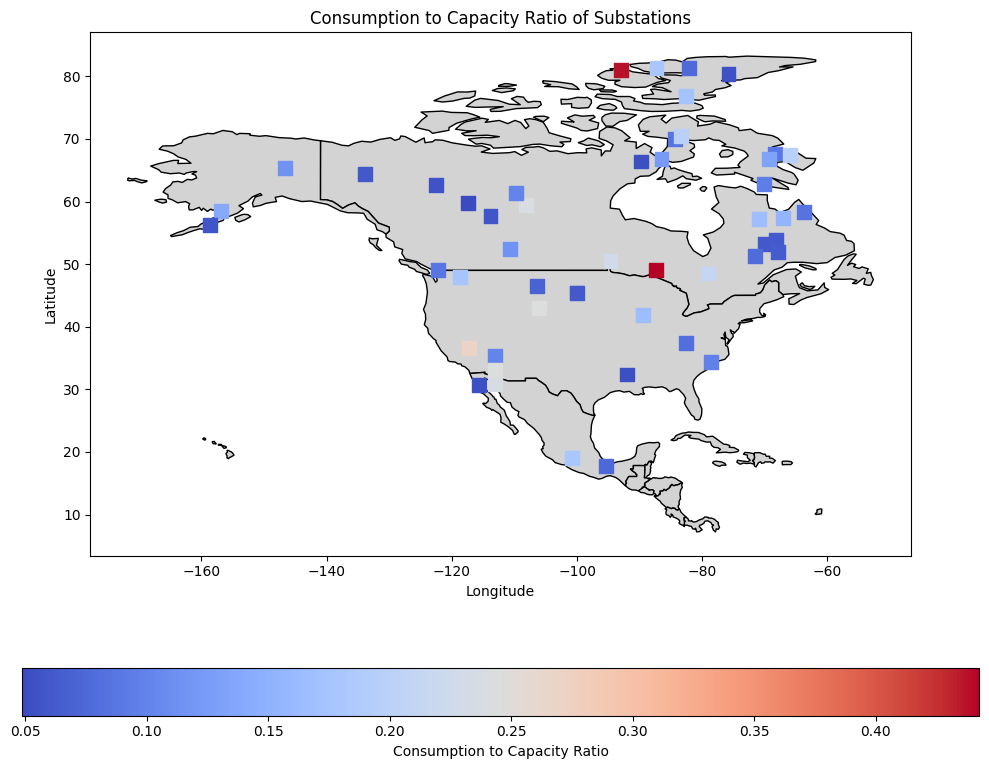

In [26]:
# Create a geoframe for the network_capacity_data dataframe
geometry_network_capacity = [Point(lon, lat) for lon, lat in zip (network_capacity_data['substation_longitude'], network_capacity_data['substation_latitude'])]
gdf_network_capacity = gpd.GeoDataFrame(network_capacity_data, geometry=geometry_network_capacity)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
north_america.plot(ax=ax, color='lightgray', edgecolor='black')
gdf_network_capacity.plot(
    column='Consumption_to_Capacity_Ratio',
    cmap='coolwarm',
    legend=True,
    marker='s',
    markersize=100,
    ax=ax,
    legend_kwds={'label': "Consumption to Capacity Ratio", 'orientation': "horizontal"}
)

# Set title and axis labels
ax.set_title("Consumption to Capacity Ratio of Substations")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [27]:
# Group by the substation_id for the number of EVs
ev_counts = distribution_data.groupby('Substation_ID')['Number_of_EVs'].sum().reset_index()

# Merge network capacity data with EV counts
final_data = pd.merge(ev_counts, network_capacity_data, on='Substation_ID')

# Calculate correlation
correlation_ratio = final_data['Number_of_EVs'].corr(final_data['Consumption_to_Capacity_Ratio'])

In [28]:
correlation_ratio

-0.10944923035990646

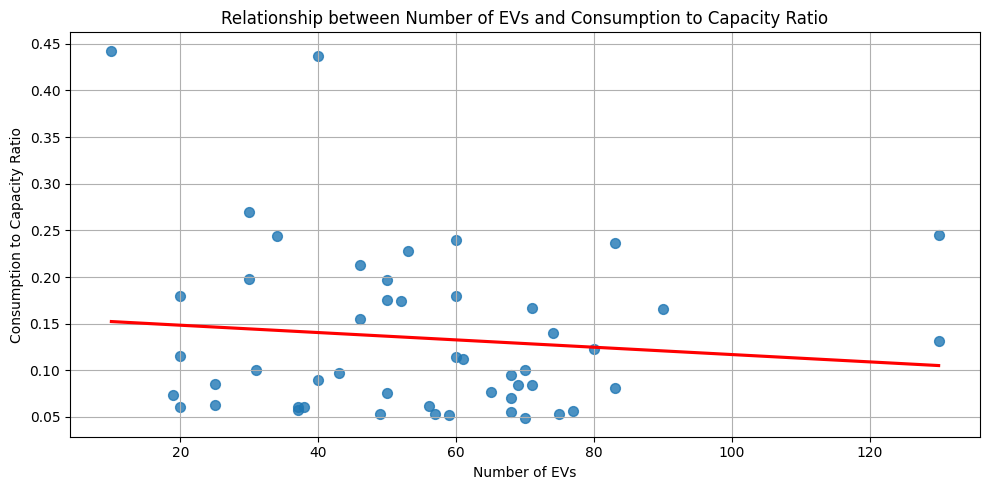

In [29]:
# Scatter plot with regression line
plt.figure(figsize=(10, 5))
sns.regplot(x='Number_of_EVs', y='Consumption_to_Capacity_Ratio', data=final_data,
            scatter_kws={'s': 50}, line_kws={'color': 'red'}, ci=None)
plt.title('Relationship between Number of EVs and Consumption to Capacity Ratio')
plt.xlabel('Number of EVs')
plt.ylabel('Consumption to Capacity Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

## Identifying Bottle necks
By analyzing the map we can identify the areas and substations that are potential bottlenecks in the distribution network. These are the areas where Consumption to Capacity Ratio is high.

In [30]:
# Filtering Consumption to Capacity ratio >= 0.9
bottleneck_substation = network_capacity_data[network_capacity_data['Consumption_to_Capacity_Ratio'] >= 0.9]

In [31]:
bottleneck_substation

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Consumption (kWh),Consumption_to_Capacity_Ratio


## Optimizing Network Upgrades:
For optimizing network upgrades, focus on substations with potential to have high Consumption_to_Capacity_Ratio. Upgrading the transmission lines or adding additional capacity in these areas can help in managing the potential to have increased load effectively and ensuring grid reliability.

Additionally, let's note from the analysis:
- The Geographical distribution of EV charging stations, where EV charging stations are quite far from the Substations.

Also, let the business look into:
- Potential future growth in EV adoption in different areas.
- Costs associated with different upgrade options.

In [32]:
top5_potential_overload_substations = network_capacity_data.nlargest(5, 'Consumption_to_Capacity_Ratio')
top5_potential_overload_substations

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Consumption (kWh),Consumption_to_Capacity_Ratio
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
14,Substation_87,12,81.031814,-92.941747,5243.800714,0.436983
26,Substation_711,17,36.618181,-117.277556,4579.354677,0.269374
46,Substation_11,43,33.082269,-113.118931,10534.827701,0.244996
41,Substation_258,22,42.952789,-106.049333,5378.214378,0.244464


## Correlation with Weather Data
Analyzing the correlation between weather data and electricity consumption can provide insights into how weather conditions affect the distribution network

In [33]:
# Merge weather data with distribution data
merged_data = pd.merge(distribution_data, weather_data, on=['Timestamp', 'Substation_ID'])

# Calculate the correlation between weather conditions and electricity consumption
correlation_matrix = merged_data[['Electricity_Consumption (kWh)', 'Temperature (°C)', 'Precipitation (mm)']].corr()

# Display
correlation_matrix

,Electricity_Consumption (kWh),Temperature (°C),Precipitation (mm)
Electricity_Consumption (kWh),1.000000,0.131543,0.085014
Temperature (°C),0.131543,1.000000,-0.005828
Precipitation (mm),0.085014,-0.005828,1.000000


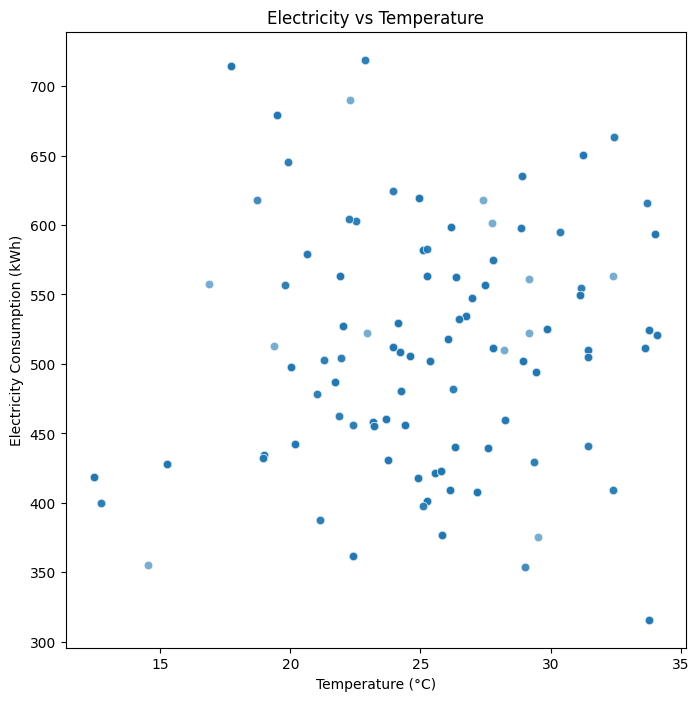

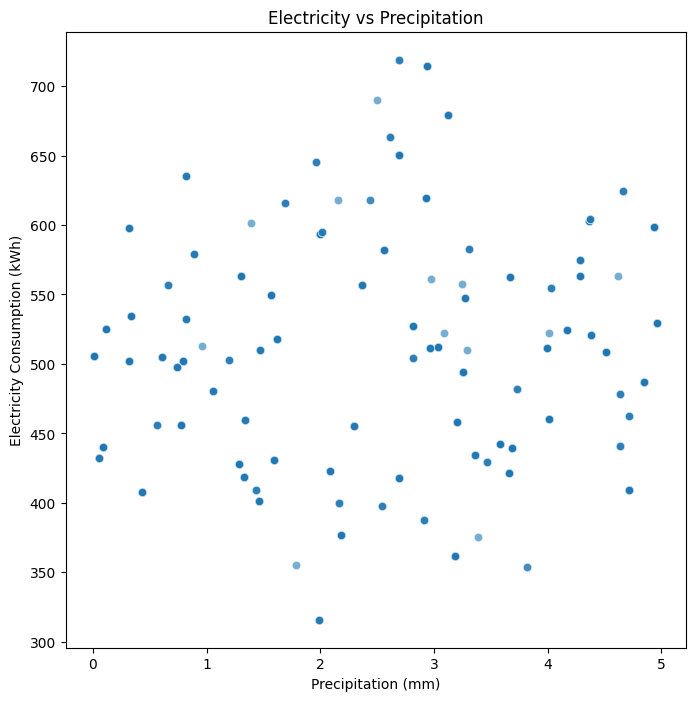

In [34]:
# Electricity consumption vs temperature
plt.figure(figsize=(8, 8))
sns.scatterplot(data=merged_data, x="Temperature (°C)", y="Electricity_Consumption (kWh)", alpha=0.6)
plt.title("Electricity vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Electricity Consumption (kWh)")
plt.show()

# Electricity consumption vs precipitation
plt.figure(figsize=(8, 8))
sns.scatterplot(data=merged_data, x="Precipitation (mm)", y="Electricity_Consumption (kWh)", alpha=0.6)
plt.title("Electricity vs Precipitation")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Electricity Consumption (kWh)")
plt.show()

## Insights
1. Electricity Consumption: The electricity consumption is mostly centered around 500 kWh, with certain instances of higher consumption. This indicates varied demand at different times and locations.
2. EV Types and Charging Habits: Electric scooters is the most common types of EVs. Most customers charge their EVs daily, indicating a consistent daily load on the distribution network
3. Consumer Type: Commercial consumers have the largest market proportion, closely followed by residential consumers who are then closely followed by industrial consumers.
4. Geospatial Distribution: The spatial distribution of substations and EV charging stations is widespread.
5. Geospatial Distribution: The distance between the Ev charging station and it's corresponding Substation seems quite significant, with some substations and corresponding EV charging stations located in 2 to 3 different countries.
6. Network Capacity: Some substations have a high EV-Consumption_to_Capacity_Ratio, this stations should be monitored considering the EV industry is a rapidly growing industry with some studies estimating a 15% annual growth year on year; indicating potential bottlenecks and overloads in the network. However, quite interestingly, there is no/weak negative correlation with the number of EVs per substation and the Consumption to Capcity Ratio, this shows that Number of EVs is not a very influential factor for overload.
7. Weather Correlation: The correlation between weather conditions (temperature and precipitation) and electricity consumption is weak in the current dataset, suggesting that other factors might be more influential in affecting electricity consumption.

## The Optimization Strategy/Recommendation
This is based on the analysis done and the business problems at hand, all these should be incorporated into the business.
1. Prioritize Substation Upgrades: Prioritize upgrades at substations where the Consumption_to_Capacity Ratio is high, indicating potential overloads. Although the highest substation ratios are between 30% to 45% it is important to note that this ratio is only for loads from EV charging station, total consumption to capacity ratios of these substations might be much higher since few substations are exclusive to EV charging stations.
2. Upgrade the transmission lines because the EV Charging Stations are too far from their corresponding Substations, this should lead to improvements in capacity, efficiency, reliabilty & stability, enable the integration of newer technologies to enhance communication, monitoring and control, reduced the line's environemental footprint and also future proof the lines
3. Consider building new transmission lines to closer substations if the long term benefits like utility rate at new sub station, maintenance cost of new tranmission lines and capacity and efficiency of electricity supplied outweigh short to medium term cons likecost of building new infrastructure and potential down times due to such endeavors.
4. Geospatial Analysis for Upgrade Planning: Use geospatial analysis to determine the optimal locations for new substations or upgrades to existing ones. Consider factors like the proximity to high load demand areas (areas with high consumption to capcity ratio) and geographical constraints.
5. Demand Side Management: Implement demand-side management strategies to balance the load on the grid. Encourage customers to charge their EVs during off-peak hours through incentives or dynamic pricing
formance o 4. Advanced Monitoring and Analytics: Deploy advanced monitoring systems to continuously monitor the health and performance potential issues and take preventive action of the distribution network. Use analytics to predict
6. Cost-Benefit Analysis: Conduct a comprehensive cost-benefit analysis for different upgrade options. Consider factors like the cost of upgrades, operational costs, potential revenue from increased capacity, and the impact on service reliability and customer satisfaction.
7. Customer Engagement: Engage with customers to understand their needs and expectations. Provide clear communication about network upgrades and how they will enhance service reliability and meet the growing demand for EV charging.
8. Continuous Improvement: Continuously monitor and assess the performance of the distribution network. Gather feedback from customers and other stakeholders, and use this feedback to make further improvements and optimizations.
By following these steps, PowerCharge Utilities can develop an effective optimization strategy to manage the increased load demand from EV charging stations, ensure the reliability and resilience of the distribution network, and meet the expectations of customers, all while optimizing costs and ensuring regulatory compliance.